# Traffic Flow Analysis ML Project

## Step 1: Create Synthetic Dataset

We’ll create a synthetic dataset for traffic flow analysis. The dataset will include features like `hour`, `day_of_week`, `weather_condition`, and `traffic_level`.


In [1]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)
num_samples = 1000

data = {
    'hour': np.random.randint(0, 24, num_samples),
    'day_of_week': np.random.randint(0, 7, num_samples),
    'weather_condition': np.random.choice(['clear', 'rain', 'snow'], num_samples),
    'traffic_level': np.random.randint(0, 101, num_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('traffic_data.csv', index=False)
print("Synthetic dataset created and saved to traffic_data.csv.")


Synthetic dataset created and saved to traffic_data.csv.


## Step 2: Train the Traffic Congestion Prediction Model
We’ll train a machine learning model to predict traffic congestion based on historical data.



In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

# Load the dataset
df = pd.read_csv('traffic_data.csv')

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['weather_condition'], drop_first=True)

# Prepare features and target
X = df.drop('traffic_level', axis=1)
y = df['traffic_level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Save the model
joblib.dump(model, 'traffic_congestion_model.pkl')
print("Model trained and saved to traffic_congestion_model.pkl.")

/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Mean Absolute Error: 26.477306998973244
Model trained and saved to traffic_congestion_model.pkl.


/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Step 3: Predict Traffic Congestion
We’ll use the trained model to predict traffic congestion for a given set of input features.



In [3]:
# Load the trained model
model = joblib.load('traffic_congestion_model.pkl')

# Example input data
input_data = {
    'hour': 8,
    'day_of_week': 1,
    'weather_condition_rain': 0,
    'weather_condition_snow': 0
}

# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

# Make prediction
prediction = model.predict(input_df)
print(f"Predicted Traffic Level: {prediction[0]}")

Predicted Traffic Level: 49.14066666666667


/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Step 4: Visualize Feature Importance
We’ll visualize the importance of each feature in the model.



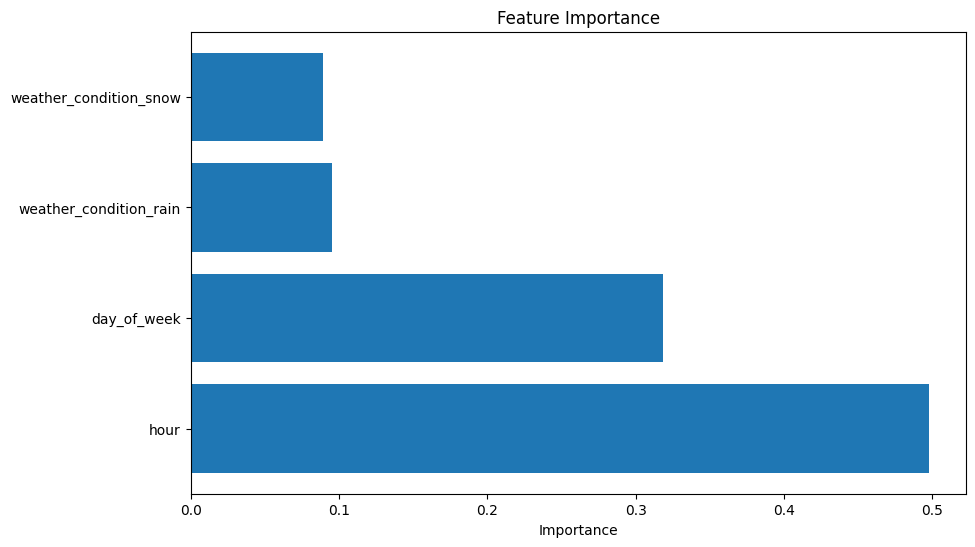

In [4]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()